# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
#Exercise 1: Method 1

#Importing the other json file as a dataframe and extracting the relevant Series.

df = pd.read_json('data/world_bank_projects.json')
countries = df['countryshortname']

#Using the Counter method would be useful here. It goes through each row and counts each different occurence.

import collections 
countries10_1 = collections.Counter(countries).most_common(10)
countries10_1
#Each tuple shows the region in the first element, and its frequency in the second element.

[('China', 19),
 ('Indonesia', 19),
 ('Vietnam', 17),
 ('India', 16),
 ('Yemen, Republic of', 13),
 ('Morocco', 12),
 ('Nepal', 12),
 ('Bangladesh', 12),
 ('Mozambique', 11),
 ('Africa', 11)]

In [9]:
#Exercise 1: Method 2 

#Use the .value_counts() method and extract the top 10 values.

countries10_2 = countries.value_counts()
countries10_2[:10]

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Nepal                 12
Bangladesh            12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

<IPython.core.display.Javascript object>


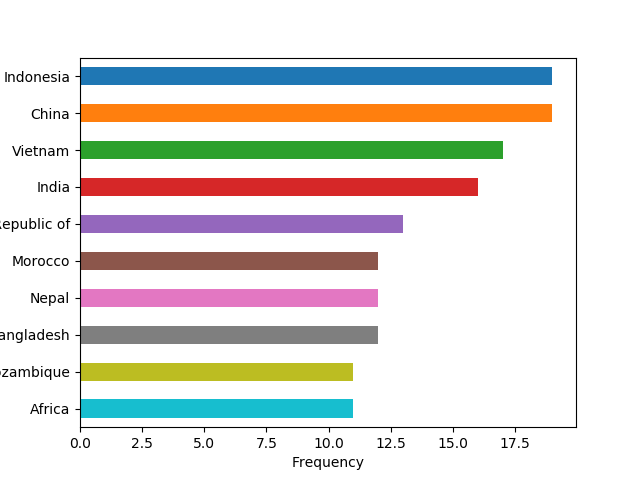

In [11]:
#Exercise 1: Data Visualization

#Use matplotlib to create a histogram of the data.
%matplotlib notebook
import matplotlib.pyplot as plt

countries10_2[:10].plot('barh').invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

In [12]:
#Exercise 2: Method 1

#This method was inspired by Raymond Hettinger's lecture (Transforming Code into Beautiful, Idiomatic Python).
#The code below creates en empty dictionary that takes in all different themes and counts how many 
#each occur, even if a single row had a variable amount of themes.

themes = df['mjtheme_namecode']
d = {}
for row in themes:
    for i in row:
        if i['name'] not in d:
            d[i['name']] = 0
        d[i['name']] += 1
d

#The dictionary, d, shows the theme as keys, and its frequency as values.

{'Human development': 197,
 '': 122,
 'Economic management': 33,
 'Social protection and risk management': 158,
 'Trade and integration': 72,
 'Public sector governance': 184,
 'Environment and natural resources management': 223,
 'Social dev/gender/inclusion': 119,
 'Financial and private sector development': 130,
 'Rural development': 202,
 'Urban development': 47,
 'Rule of law': 12}

In [13]:
#The code below sorts the dictionary based on its value, from most to least, showing only the top ten themes.

ordered_1 = sorted(d.items(), key=lambda x: x[1], reverse=True)
themes10_1 = ordered_1[:10]
themes10_1

[('Environment and natural resources management', 223),
 ('Rural development', 202),
 ('Human development', 197),
 ('Public sector governance', 184),
 ('Social protection and risk management', 158),
 ('Financial and private sector development', 130),
 ('', 122),
 ('Social dev/gender/inclusion', 119),
 ('Trade and integration', 72),
 ('Urban development', 47)]

In [14]:
#Exercise 2: Method 2

#This method was also inspired by RH's lecture, an even more succinct way of doing this. 

d2 = collections.defaultdict(int)
for row in themes:
    for i in row:
        d2[i['name']] += 1
d2

defaultdict(int,
            {'Human development': 197,
             '': 122,
             'Economic management': 33,
             'Social protection and risk management': 158,
             'Trade and integration': 72,
             'Public sector governance': 184,
             'Environment and natural resources management': 223,
             'Social dev/gender/inclusion': 119,
             'Financial and private sector development': 130,
             'Rural development': 202,
             'Urban development': 47,
             'Rule of law': 12})

In [15]:
ordered_2 = sorted(d2.items(), key=lambda x: x[1], reverse=True)
themes10_2 = ordered_2[:10]
themes10_2

[('Environment and natural resources management', 223),
 ('Rural development', 202),
 ('Human development', 197),
 ('Public sector governance', 184),
 ('Social protection and risk management', 158),
 ('Financial and private sector development', 130),
 ('', 122),
 ('Social dev/gender/inclusion', 119),
 ('Trade and integration', 72),
 ('Urban development', 47)]

<IPython.core.display.Javascript object>


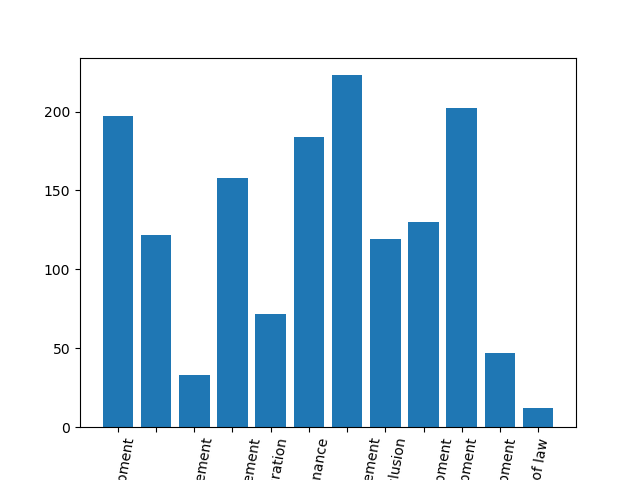

In [16]:
#Exercise 2: Data Visualization

plt.bar(range(len(d)), d.values())
plt.xticks(range(len(d)), list(d.keys()))
plt.xticks(rotation=80)
plt.show()

In [17]:
#Question 3: Method 1 

#Make a new dictionary, d3, with the 'code' value as the key, and the 'name' value.
#The first element of themes, used in Question 2 has a missing value, "'name': ''".

themes[0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [18]:
d3 = {}
for row in themes:
    for i in row:
        if i['name'] != '':
            d3[i['code']] = i['name'] 
        
print(d3)

for row in themes:
    for i in row:
        i['name'] =  d3[i['code']]

#Now each code (keys) has an associated theme (values).

{'8': 'Human development', '1': 'Economic management', '6': 'Social protection and risk management', '5': 'Trade and integration', '2': 'Public sector governance', '11': 'Environment and natural resources management', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}


In [19]:
#The themes are now filled out according to their corresponding code.
#The first element of themes no longer has a missing value
themes[0]

[{'code': '8', 'name': 'Human development'},
 {'code': '11', 'name': 'Environment and natural resources management'}]

In [20]:
#To be absolutely sure, I redid the method done in Question 2: Method 1.
#"'': 122" no longer appears! 

themes = df['mjtheme_namecode']
d = {}
for row in themes:
    for i in row:
        if i['name'] not in d:
            d[i['name']] = 0
        d[i['name']] += 1
d

{'Human development': 210,
 'Environment and natural resources management': 250,
 'Economic management': 38,
 'Social protection and risk management': 168,
 'Trade and integration': 77,
 'Public sector governance': 199,
 'Social dev/gender/inclusion': 130,
 'Financial and private sector development': 146,
 'Rural development': 216,
 'Urban development': 50,
 'Rule of law': 15}

In [21]:
#Below is the filled dataframe 
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
